In [12]:
import pandas as pd
df=pd.read_csv('movieReplicationSet.csv')
for i in [9, 49, 4, 24, 44, 39, 48, 50, 53, 28, 13]:
    print(df.columns[421+i])


Is full of energy
The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared
Is reserved
Has an assertive personality
I have trouble following the story of a movie
Has few artistic interests
As a movie unfolds I start to have problems keeping track of events that happened earlier
When watching a movie I get completely immersed in the alternative reality of the film
Gender identity (1 = female; 2 = male; 3 = self-described)
Values artistic/aesthetic experiences
Is ingenious/a deep thinker


In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys

import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples
data = np.genfromtxt('movieReplicationSet.csv', delimiter = ',',skip_header = 1)
data

array([[nan, nan, 4. , ..., 1. , 0. , 1. ],
       [nan, nan, 1.5, ..., 1. , 0. , 0. ],
       [nan, nan, nan, ..., 1. , 1. , 0. ],
       ...,
       [nan, nan, nan, ..., 1. , 0. , 0. ],
       [nan, nan, nan, ..., 1. , 0. , 1. ],
       [nan, nan, 4. , ..., 1. , 0. , 1. ]])

In [2]:
b = np.empty((1097,54))
for i in range(421,475):
    temp = data[:,i:i+1]
    #print(temp)
    temp2  = np.isfinite(data[:,i:i+1])
    temp = temp[temp2]
    avg = np.median(temp)
    
    for j in range(len(temp2)):
        if temp2[j] == True:
            b[j][i-421] = data[j,i]
        else:
            b[j][i-421] = avg
data = b

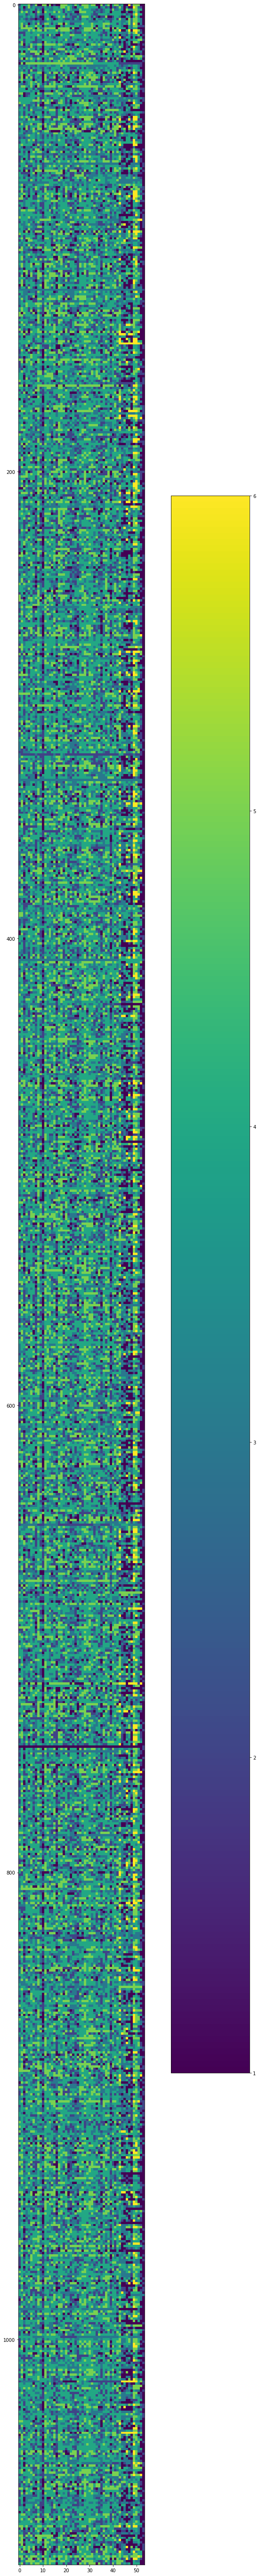

In [3]:
plt.figure(figsize = (20,100))
plt.imshow(data) # Display an image, i.e. data, on a 2D regular raster.
plt.colorbar() # Add color bar

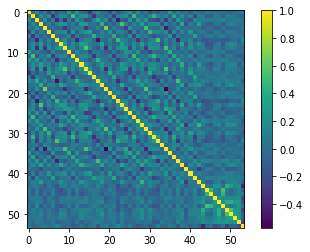

In [4]:
r = np.corrcoef(data,rowvar=False) # True = variables are rowwise; False = variables are columnwise
# Plot the data:
plt.imshow(r) 
plt.colorbar()

In [5]:
zscoredData = stats.zscore(data)

# 2. Run the PCA:
pca = PCA().fit(zscoredData)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadings = pca.components_

# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedData = pca.fit_transform(zscoredData)

[6.64216455 4.64944788 3.41647703 3.19985232 2.94917137 2.20581848
 1.93939567 1.57019085 1.16565993 1.05101263 1.01787953 0.98823149
 0.91637216 0.88642271 0.84917938 0.84097796 0.81714563 0.78655086
 0.76067674 0.75196921 0.72304772 0.69467379 0.68004971 0.66461518
 0.65004819 0.64306721 0.62133318 0.61083002 0.60552362 0.59789216
 0.5643873  0.55297829 0.54656506 0.5287358  0.51332229 0.49904523
 0.49281453 0.47919076 0.45974593 0.45642376 0.42727389 0.42133516
 0.40724271 0.40042709 0.390619   0.38361227 0.37281803 0.36698192
 0.36026784 0.33683959 0.33131933 0.32265874 0.29998415 0.23900427]


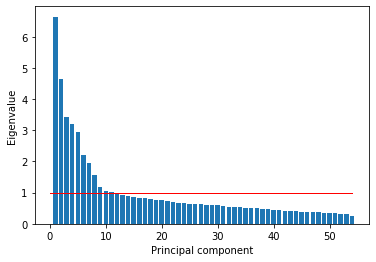

In [35]:
numClasses = 54
plt.bar(np.linspace(1,54,54),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line
print(eigVals)

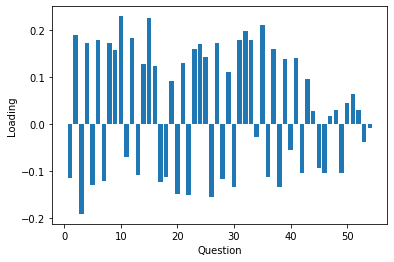

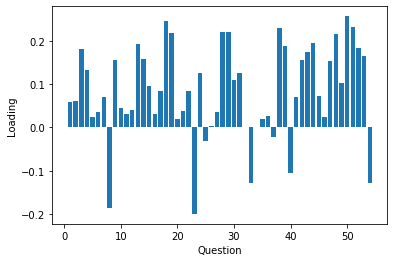

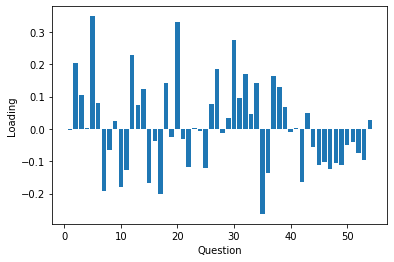

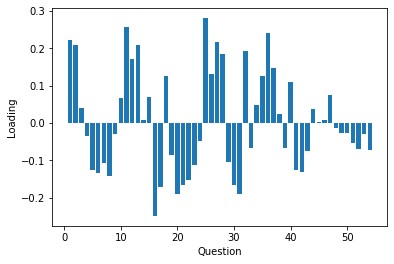

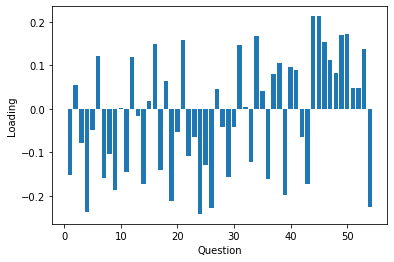

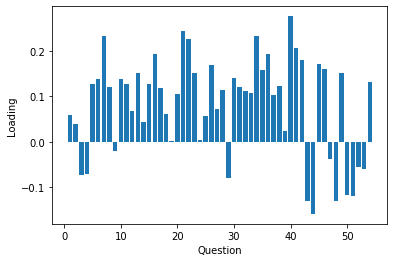

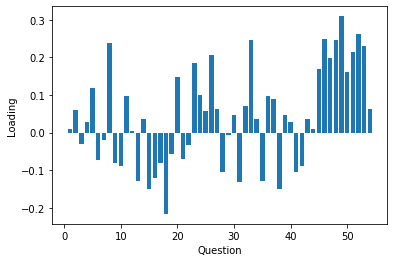

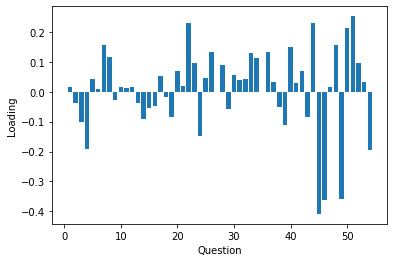

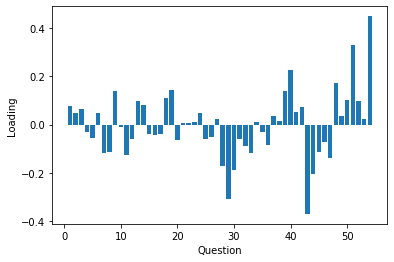

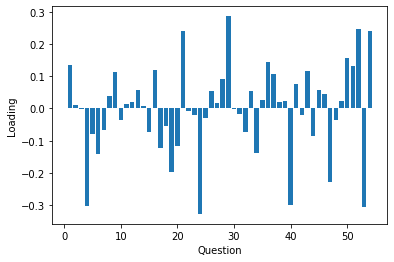

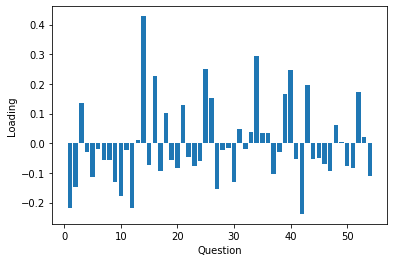

In [36]:
lst =[]
for i in range(11):
    whichPrincipalComponent = i # Try a few possibilities (at least 1,2,3 - or 0,1,2 that is - indexing from 0)

    # 1: The first one accounts for almost everything, so it will probably point 
    # in all directions at once
    # 2: Challenging/informative - how much information?
    # 3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?
    lst.append(np.argmax((loadings[whichPrincipalComponent,:]*-1)))
    plt.figure()
    plt.bar(np.linspace(1,54,54),loadings[whichPrincipalComponent,:]*-1)
    plt.xlabel('Question')
    plt.ylabel('Loading')
    plt.show()

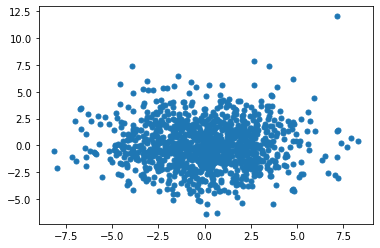

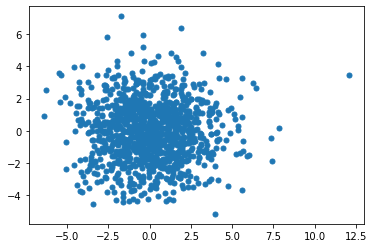

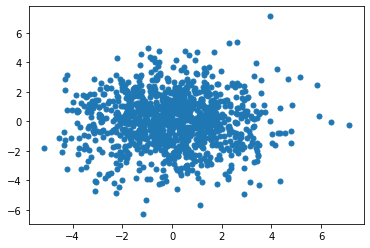

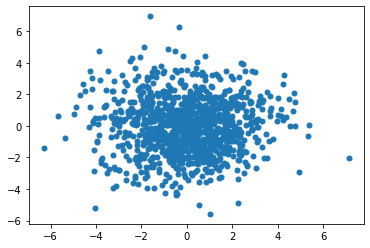

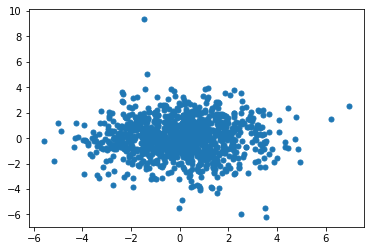

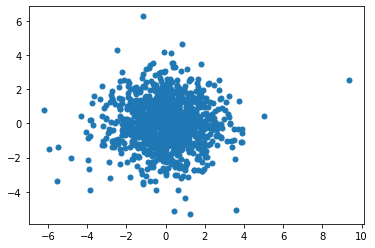

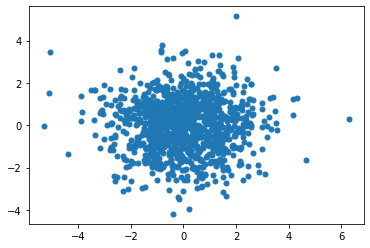

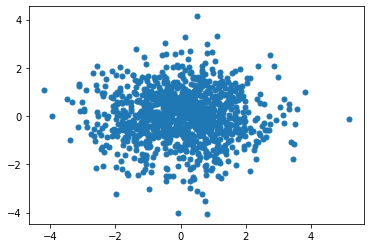

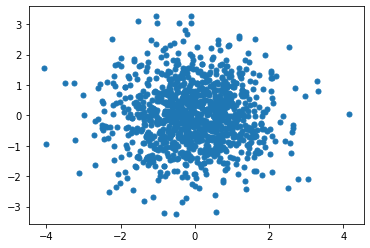

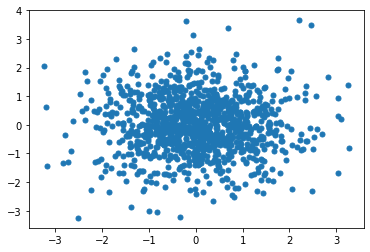

In [37]:
count = 0
for i in range(len(lst)-1):
    
    plt.figure()
    plt.plot(rotatedData[:,i],rotatedData[:,i+1],'o',markersize=5)
    plt.show()

In [38]:
print(lst)
import pandas as pd
new_data = np.empty((1097,len(lst)))
count = 0
for i in lst:
    new_data[:,count:count+1] = data[:,i:i+1]
    count+=1
new_data = pd.DataFrame(new_data)
new_data

[9, 49, 4, 24, 44, 39, 48, 50, 53, 28, 13]


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,5.0,5.0,5.0,4.0,1.0,2.0,5.0,1.0,5.0,5.0
1,3.0,6.0,5.0,1.0,3.0,1.0,1.0,5.0,1.0,5.0,4.0
2,3.0,5.0,3.0,3.0,3.0,2.0,3.0,5.0,1.0,4.0,3.0
3,4.0,4.0,3.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,4.0
4,3.0,5.0,3.0,3.0,3.0,4.0,2.0,6.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1092,3.0,5.0,3.0,2.0,4.0,2.0,3.0,5.0,1.0,5.0,3.0
1093,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,1.0,4.0,2.0
1094,3.0,6.0,5.0,4.0,2.0,1.0,1.0,6.0,1.0,5.0,5.0
1095,5.0,4.0,5.0,3.0,5.0,2.0,1.0,3.0,1.0,5.0,5.0


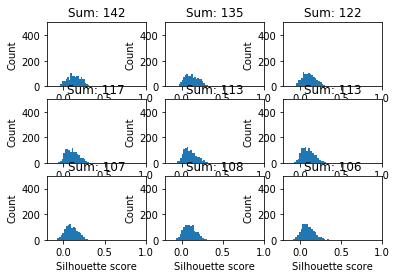

In [43]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(new_data) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(new_data,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2])))

Text(0, 0.5, 'Sum of silhouette scores')

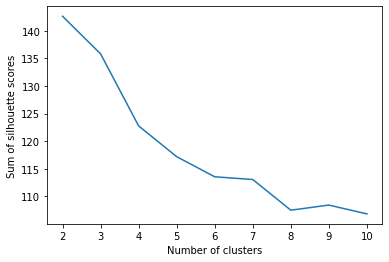

In [44]:
plt.plot(np.linspace(2,10,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')

In [45]:

kMean =KMeans(n_clusters = 2).fit(new_data) # compute kmea

labels = kMean.labels_
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        clusters[item] +=1
    else:
        clusters[item] = 0
    n +=1
print(clusters)

{0: 639, 1: 456}


NameError: name 'y' is not defined